## KNN Classification from Scratch

by : Pradeeshkumar U , date : 03/05/2025

Importing Required Dataset (except the Scikit learn packages)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import Counter
warnings.filterwarnings('ignore')

Loading Dataset

In [2]:
from sklearn import datasets

data = pd.DataFrame(datasets.load_iris().data, columns=datasets.load_iris().feature_names)
data['target'] = datasets.load_iris().target

Data Analysis

In [3]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
data.shape

(150, 5)

In [6]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [8]:
data = data.fillna(data.mean())

Data Visualisation

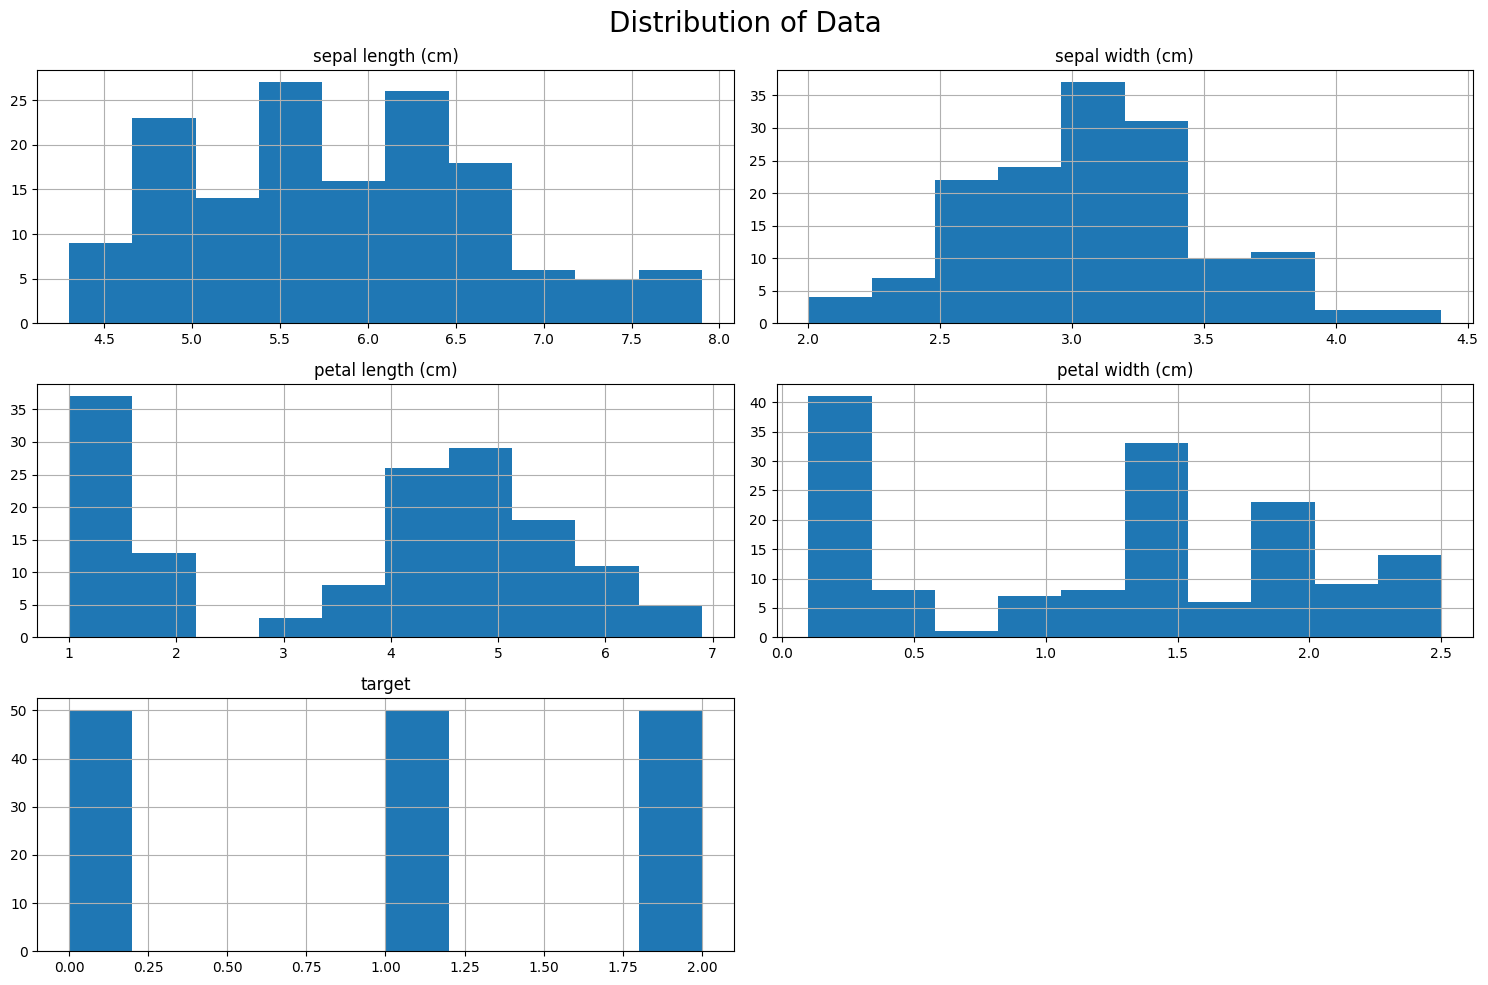

In [9]:
data.hist(figsize=(15,10))
plt.suptitle('Distribution of Data', fontsize=20)
plt.tight_layout()
plt.show()

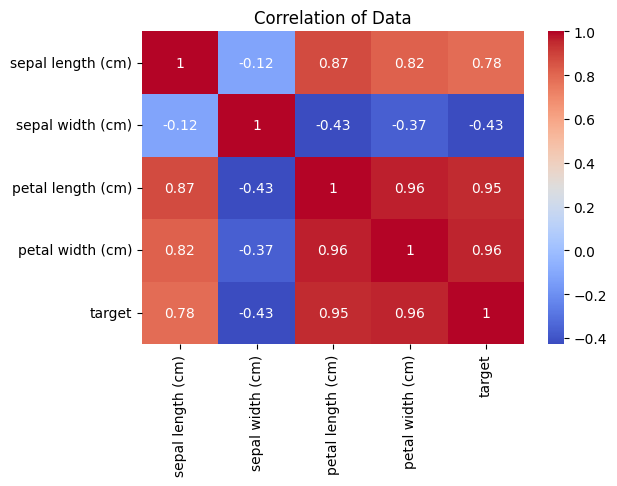

In [10]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.tight_layout()
plt.title('Correlation of Data')
plt.show()

Splitting the Data into Train and Test sets

In [11]:
def TrainTestSplit(data,test_size=0.2):
    train = data.sample(frac=1-test_size,random_state=42)
    test = data.drop(train.index)
    tar = data.columns[-1]
    return train.drop(columns=[tar]),test.drop(columns=[tar]),train[tar],test[tar]

In [12]:
Xtrain,Xtest,ytrain,ytest = TrainTestSplit(data)

Scaling the data to make the KNN work faster

In [13]:
def StandardScaler(c,mean,std):
    return (c-mean)/std

In [14]:
Xtrain_scaled = StandardScaler(Xtrain,Xtrain.mean(),Xtrain.std())
Xtest_scaled = StandardScaler(Xtest,Xtrain.mean(),Xtrain.std())

Creating the KNN Classification Model

In [15]:
class KNN_Classification:
    def __init__(self,k=1):
        self.k=k
        
    def fit(self,X,y):
        self.X_train = X.values
        self.y_train = y.values
        
    def _predict(self,x):
        dist = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        k_i = np.argsort(dist)[:self.k]
        labels = [self.y_train[i] for i in k_i]
        return int(Counter(labels).most_common()[0][0])
    
    def predict(self,X):
        pred = [self._predict(x) for x in X.values]
        return pred

Function to get Accuracy score of the model

In [16]:
def accuracy_score(ytest,ypred):
    return np.round((np.sum(ytest == ypred) / len(ytest)),2)

Function to Fit and make Predictions with the model

In [17]:
model = KNN_Classification(k=6)
model.fit(Xtrain_scaled,ytrain)

ypred_train = model.predict(Xtrain_scaled)

ypred = model.predict(Xtest_scaled)

In [18]:
print('Accuracy Score of Training Data',accuracy_score(ytrain.values,ypred_train))

Accuracy Score of Training Data 0.98


In [19]:
print('Accuracy Score of Testing Data',accuracy_score(ytest.values,ypred))

Accuracy Score of Testing Data 0.97


Since both the Scores are almost equal and are actually Great ,The model is performing well

The Classification report gives the Precision , Recall and F1 Score of our model and it is written to return the confusion matrix as well

In [20]:
def classification_report(ytest,ypred):
    TP,TN,FP,FN = 0,0,0,0
    for i in range(len(ytest)):
        if ytest[i] == 1 and ypred[i] == 1:
            TP += 1
        elif ytest[i] == 0 and ypred[i] == 0:
            TN += 1
        elif ytest[i] == 0 and ypred[i] == 1:
            FP += 1
        else:
            FN += 1
    print('Accuracy  : ',(TP+TN)/(TP+TN+FP+FN))
    print('Precision : ',TP/(TP+FP))
    print('Recall    : ',TP/(TP+FN))
    print('F1 Score  : ',2*(TP/(TP+FP)*TP/(TP+FN))/(TP/(TP+FP)+TP/(TP+FN)))
    return [[TP,TN],[FN,FP]]

In [21]:
conf_matrix = classification_report(ytest.values,ypred)

Accuracy  :  0.6
Precision :  1.0
Recall    :  0.4782608695652174
F1 Score  :  0.6470588235294118


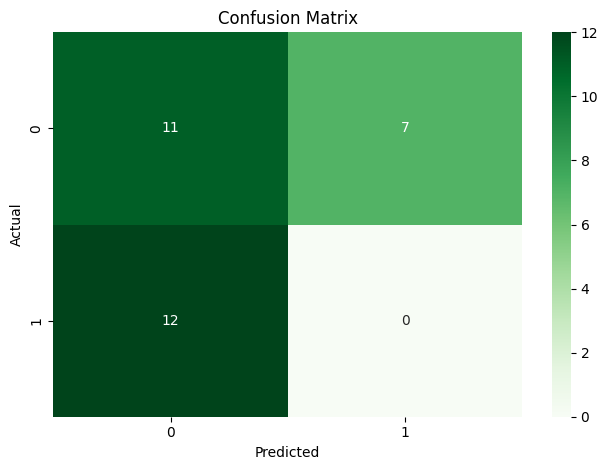

In [22]:
sns.heatmap(conf_matrix,annot=True,cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.tight_layout()
plt.ylabel('Actual')
plt.show()